# ***Binär Klassificering med Keras: En Nybörjarguide***
---
***Vad är Binär Klassificering?***

**Binär klassificering** är en typ av klassificeringsuppgift där det bara finns två möjliga utfall, till exempel ja/nej, sant/falskt, eller i detta fall, huruvida en tumör är godartad eller elakartad. Vi ska använda Keras för att bygga ett enkelt neuralt nätverk som löser detta problem.

Vi kommer att använda **Breast Cancer Wisconsin-datasetet** från Scikit-learn för att klassificera tumörer som antingen godartade eller elakartade.

### ***1: Installera nödvändiga bibliotek***

Vi behöver installera TensorFlow (som inkluderar Keras) och Scikit-learn om de inte redan är installerade. 
Kör följande kod i terminalen för att installera dem: **pip install tensorflow scikit-learn**

### ***2: Importera bibliotek***

Vi börjar med att importera alla nödvändiga bibliotek och paket.

In [59]:
# Importera nödvändiga bibliotek
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

- **load_breast_cancer:** Dataset för bröstcancer från Scikit-learn.
- **train_test_split:** Används för att dela upp data i tränings- och testdata.
- **StandardScaler:** För att normalisera funktionerna.
- **Sequential och Dense:** Används för att skapa det neurala nätverket med Keras.
- **accuracy_score:** För att mäta modellens noggrannhet.

### ***3: Ladda och förbered data***

Vi laddar **Breast Cancer Wisconsin-datasetet**, som innehåller 30 funktioner som beskriver olika tumöregenskaper och en målvariabel som representerar om tumören är godartad eller elakartad.

In [60]:
# Ladda datasetet
data = load_breast_cancer()

# Dela upp data i funktioner (X) och målvariabel (y)
X = data.data  # Funktioner
y = data.target  # Målvariabel (1 = godartad, 0 = elakartad)

# Visa datans form och beskrivning
print(f"Antal rader: {X.shape[0]}, Antal kolumner: {X.shape[1]}")
print(f"Funktioner: {data.feature_names}")
print(f"Målvariabel: {data.target_names}")

Antal rader: 569, Antal kolumner: 30
Funktioner: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Målvariabel: ['malignant' 'benign']


### ***4: Dela upp data i tränings- och testset***

Vi delar upp datasetet i tränings- och testset för att senare kunna utvärdera modellens prestanda på osedda data.

In [61]:
# Dela upp data i träningsset och testset (80% träning, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisera funktionerna (mycket viktigt för neuralnät)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- **train_test_split:** Delar upp data i träningsset och testset.
- **StandardScaler:** Normaliserar funktionerna så att de har ett medelvärde på 0 och standardavvikelse på 1, vilket hjälper modellen att konvergera snabbare.

### ***5: Bygg en sekventiell modell med Keras***

Vi bygger en enkel sekventiell modell med Keras som består av två täta (dense) lager. Det första lagret använder ReLU som aktiveringsfunktion och det sista lagret använder sigmoid, som är perfekt för binär klassificering.

In [62]:
# Skapa en sekventiell modell
model = Sequential()

# Första dolda lagret med 16 noder och ReLU aktiveringsfunktion
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))

# Andra dolda lagret med 8 noder och ReLU aktiveringsfunktion
model.add(Dense(8, activation='relu'))

# Utgångslager med 1 nod (eftersom detta är binär klassificering) och sigmoid aktiveringsfunktion
model.add(Dense(1, activation='sigmoid'))

c:\Users\kharo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### ***6: Kompilera modellen***

När modellen är byggd måste vi kompilera den. För en binär klassificeringsuppgift använder vi **binary_crossentropy** som förlustfunktion och **adam** som optimerare.

In [63]:
# Kompilera modellen
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Visa modellens sammanfattning
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

- ***binary_crossentropy:*** Förlustfunktionen som används för binär klassificering.
- ***adam:*** En optimeringsalgoritm som fungerar bra för många typer av problem.
- ***accuracy:*** En metrisk som används för att spåra noggrannheten under träningen.

### ***7: Träna modellen***

Nu är vi redo att träna vår modell med träningsdatan. Vi specificerar antalet epoker och batchstorlek.

In [64]:
# Träna modellen på träningsdata
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4281 - loss: 0.7317 - val_accuracy: 0.7143 - val_loss: 0.6365
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7337 - loss: 0.5938 - val_accuracy: 0.8242 - val_loss: 0.5071
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8731 - loss: 0.4722 - val_accuracy: 0.8462 - val_loss: 0.4184
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9010 - loss: 0.3923 - val_accuracy: 0.8571 - val_loss: 0.3566
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9349 - loss: 0.3268 - val_accuracy: 0.8681 - val_loss: 0.3096
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9541 - loss: 0.2727 - val_accuracy: 0.8681 - val_loss: 0.2752
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9470 - loss: 0.2353 - val_accuracy: 0.8681 - val_loss: 0.2501
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9440 - loss: 0.2140 - val_accuracy: 0.8791 - val_loss

- ***epochs:*** Antal gånger modellen ska träna på hela träningsdatan.
- ***batch_size:*** Hur många datapunkter som bearbetas innan modellens parametrar uppdateras.
- ***validation_split:*** En del av träningsdatan används som valideringsdata för att kontrollera modellens prestanda under träningen.

### ***8: Utvärdera modellen***

När modellen har tränats utvärderar vi den på testdata för att se hur bra den presterar på osedda data.

In [65]:
# Utvärdera modellen på testdata
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Testförlust: {test_loss}")
print(f"Testnoggrannhet: {test_accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9672 - loss: 0.0950 
Testförlust: 0.08649752289056778
Testnoggrannhet: 0.9649122953414917


### ***9: Gör förutsägelser***

Vi kan nu göra förutsägelser med hjälp av vår tränade modell och jämföra dessa med de faktiska etiketterna i testsetet.

In [66]:
# Gör förutsägelser
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Beräkna och visa noggrannheten
accuracy = accuracy_score(y_test, y_pred)
print(f"Noggrannhet på testdata: {accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Noggrannhet på testdata: 0.9649122807017544


### ***10: Visualisera träningsförloppet***

Slutligen kan vi visualisera hur förlusten och noggrannheten utvecklades under träningen för att få en känsla av hur modellen presterade.

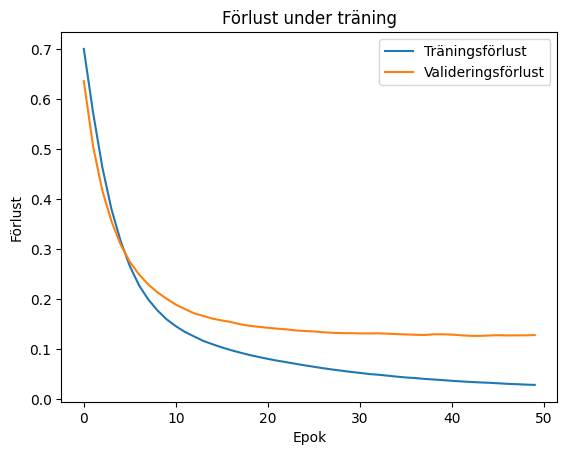

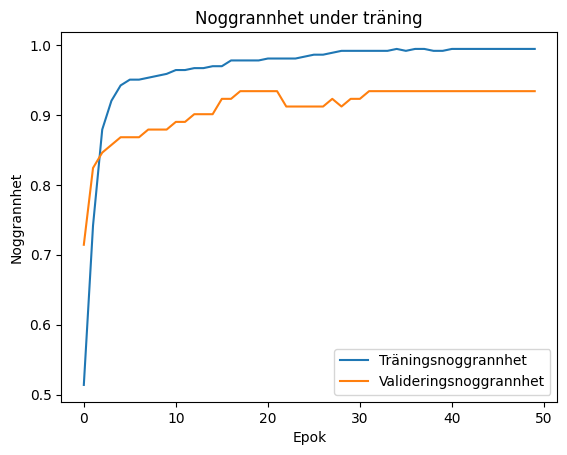

In [67]:
# Plotta träningsförloppet
import matplotlib.pyplot as plt

# Förlust
plt.plot(history.history['loss'], label='Träningsförlust')
plt.plot(history.history['val_loss'], label='Valideringsförlust')
plt.title('Förlust under träning')
plt.xlabel('Epok')
plt.ylabel('Förlust')
plt.legend()
plt.show()

# Noggrannhet
plt.plot(history.history['accuracy'], label='Träningsnoggrannhet')
plt.plot(history.history['val_accuracy'], label='Valideringsnoggrannhet')
plt.title('Noggrannhet under träning')
plt.xlabel('Epok')
plt.ylabel('Noggrannhet')
plt.legend()
plt.show()

### ***Sammanfattning:***

I denna övning byggde vi ett enkelt neuralt nätverk med Keras för binär klassificering av tumörer som antingen godartade eller elakartade. Vi tränade modellen på Breast Cancer Wisconsin-datasetet och utvärderade dess prestanda med hjälp av noggrannhet och förlust.

---

### ***Ett exempel till:***

Låt oss börja med ett exempel till att importera nödvändiga bibliotek som fattas och förbereda vår data.

In [68]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

# Ladda data (vi använder Iris-datasetet och gör det till ett binärt klassificeringsproblem)
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(int)  # 1 om Iris Setosa, annars 0

# Dela upp data i tränings- och testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skala features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


- Vi importerar nödvändiga bibliotek, inklusive Keras från TensorFlow.
- Vi laddar Iris-datasetet och omvandlar det till ett binärt klassificeringsproblem (Iris Setosa vs. övriga).
- Vi delar upp data i tränings- och testset.
- Vi skalar våra features för att förbättra modellens prestanda.

Nu ska vi bygga vår neurala nätverksmodell med Keras.

In [69]:
# Bygg modellen
model = Sequential([
    Dense(16, activation='relu', input_shape=(4,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Notera: 1 utdatanod för binär klassificering
])

# Kompilera modellen
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Skriv ut en sammanfattning av modellen
model.summary()

c:\Users\kharo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)


- Vi skapar en sekventiell modell med tre lager:
    - Ett inmatningslager med 16 noder och ReLU-aktivering
    - Ett dolt lager med 8 noder och ReLU-aktivering
    - Ett utmatningslager med 1 nod och sigmoid-aktivering (ger en sannolikhet mellan 0 och 1)
- Vi kompilerar modellen med Adam-optimeraren, binary crossentropy som förlustfunktion, och accuracy som metrik.
- Vi skriver ut en sammanfattning av modellen för att se dess struktur.


Nu är det dags att träna modellen:

In [72]:
# Träna modellen
history = model.fit(X_train_scaled, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2, 
                    verbose=1)

# Utvärdera modellen på testdata
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.3f}')

# Gör prediktioner
y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1)

# Skriv ut confusion matrix och klassificeringsrapport
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred_classes))
print('\nClassification Report:')
print(classification_report(y_test, y_pred_classes))

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - loss: 0.0232 - val_accuracy: 1.0000 - val_loss: 0.0152
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.0259 - val_accuracy: 1.0000 - val_loss: 0.0148
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0231 - val_accuracy: 1.0000 - val_loss: 0.0144
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.0214 - val_accuracy: 1.0000 - val_loss: 0.0141
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.0208 - val_accuracy: 1.0000 - val_loss: 0.0138
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0211 - val_accuracy: 1.0000 - val_loss: 0.0135
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0220 - val_accuracy: 1.0000 - val_loss: 0.0131
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0226 - val_accuracy: 1.0000 - val_loss: 0.0128



- Vi tränar modellen på vårt träningsdata. Vi använder 20% av träningsdatan för validering under träningen.
- Vi utvärderar modellen på vårt testdata för att se hur väl den generaliserar.
- Vi gör prediktioner på testdatan och omvandlar sannolikheter till klasser (> 0.5 blir klass 1, annars klass 0).
- Vi skriver ut en confusion matrix och en klassificeringsrapport för att få en detaljerad bild av modellens prestanda.

***Visualisering av träningshistorik***

För att bättre förstå hur vår modell presterade under träningen, kan vi visualisera träningshistoriken:

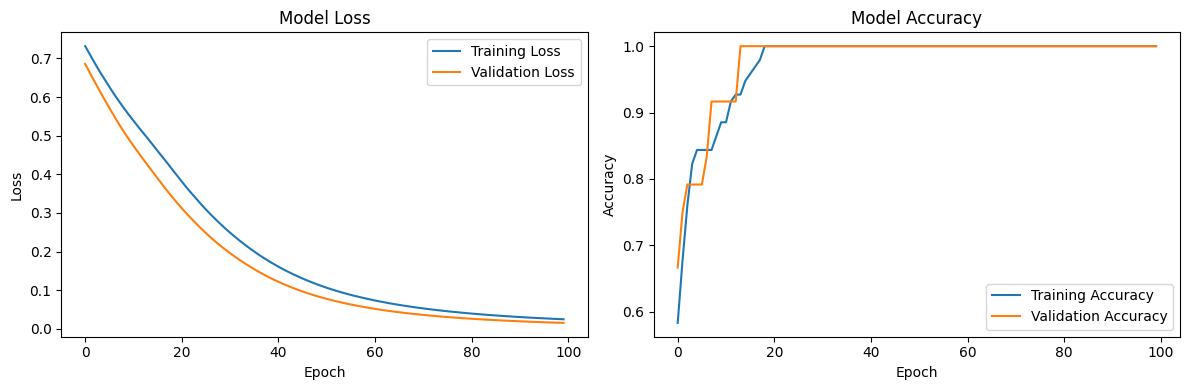

In [71]:
import matplotlib.pyplot as plt

# Plotta tränings- och valideringsförlust
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotta tränings- och valideringsnoggrannhet
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

***Sammanfattning***

I denna guide har vi gått igenom processen att bygga en enkel neural nätverksmodell för binär klassificering med Keras. Vi har lärt oss att:

- Förbereda data för binär klassificering
- Bygga en enkel neural nätverksmodell med Keras
- Träna och utvärdera modellen
- Tolka resultaten med hjälp av olika mått och visualiseringar

Binär klassificering med neurala nätverk kan vara mycket effektiv för många problem, men kom ihåg att experimentera med olika modellarkitekturer, hyperparametrar och förbehandling av data för att uppnå bästa möjliga resultat för ditt specifika problem.